In [1]:
#!pip install opencv-python

In [1]:
#from collections import defaultdict
#import itertools
#import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yaml
import os
from coco import COCO
import json

In [2]:
# Read YAML file
with open("config.yaml", 'r') as stream:
    config_file = yaml.safe_load(stream)

DATASET_DIR = config_file['dataset_src_dir']
    
TRAIN_PATH = os.path.join(DATASET_DIR, config_file['train'])
VAL_PATH = os.path.join(DATASET_DIR, config_file['val'])
TEST_PATH = os.path.join(DATASET_DIR, config_file['test'])

IMAGES_PATH = os.path.join(DATASET_DIR, 'images/')

dataset_path = os.path.join(DATASET_DIR, 'coco_hurtigruten.json')
MERGE_CLASSES = False

In [3]:
if MERGE_CLASSES:
    '''
    Merge classes and remove non boat annotations
    '''
    non_boats = ['buoys', 'fish_farm']
    non_boats_id = [11, 23]
    with open(dataset_path) as stream:
        dataset_file = yaml.safe_load(stream)
    
    merged_dataset = dataset_file.copy()
    merged_dataset['annotations'] = [annot for annot in dataset_file['annotations'] if annot['category_id'] not in non_boats_id]
    for annot in merged_dataset['annotations']:
        annot['category_id'] = 0

    categories = { "supercategory": "none", "id": 0, "name": "boat" }
    merged_dataset['categories'] = [categories]

    dataset_path = os.path.join(DATASET_DIR, 'coco_hurtigruten_one_class.json')
    with open(dataset_path, 'w+') as outfile:
        json.dump(merged_dataset, outfile, indent=4)

In [4]:
#dataset_path = os.path.join(DATASET_DIR, 'coco_hurtigruten.json')
data = COCO(dataset_path)
CLASSES = {id: cat['name'] for id, cat in data.cats.items()}

creating index...
index created!


In [5]:
catIds = list(CLASSES.keys())
catIds.sort()
sorted_class_names = [CLASSES[id] for id in catIds]
dataset_info = {'path': DATASET_DIR, 'train': config_file['train'], 'val': config_file['val'], 'test': config_file['test'], 'nc': len(CLASSES), 'names': sorted_class_names}

In [6]:

# Read YAML file
with open("dataset.yaml", 'w+') as file:
    yaml.dump(dataset_info, file)

In [7]:
numb_images = len(data.imgs)
print('Number of images: ', numb_images)
numb_of_categories = len(data.cats)
print('Number of classes:', numb_of_categories)
print('Classes:', [cat['name'] for cat in data.cats.values()])

Number of images:  4994
Number of classes: 26
Classes: ['open_pleasure_craft', 'rhib', 'semi_open_pleasure_craft', 'fishing_vessel', 'enclosed_pleasure_craft', 'Tugs', 'other_passenger_vessel', 'unspecified', 'kayak', 'catamaran_express_ferry', 'buoys', 'supply_vessel', 'cargo_vessel', 'container_vessel', 'ferry', 'sailboat_motor', 'yacht', 'sailboat_sail', 'rescue_vessel', 'cruise_vessel', 'sailboat_motor_multiple', 'sailboat_sail_multiple', 'fish_farm', 'barge', 'jetski', 'ro_ro_vessel']


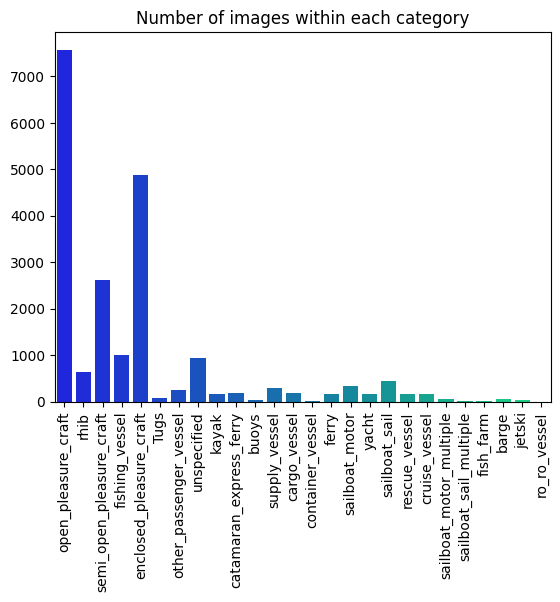

{1: 'open_pleasure_craft', 2: 'rhib', 3: 'semi_open_pleasure_craft', 4: 'fishing_vessel', 5: 'enclosed_pleasure_craft', 6: 'Tugs', 7: 'other_passenger_vessel', 8: 'unspecified', 9: 'kayak', 10: 'catamaran_express_ferry', 11: 'buoys', 12: 'supply_vessel', 13: 'cargo_vessel', 14: 'container_vessel', 15: 'ferry', 16: 'sailboat_motor', 17: 'yacht', 18: 'sailboat_sail', 19: 'rescue_vessel', 20: 'cruise_vessel', 21: 'sailboat_motor_multiple', 22: 'sailboat_sail_multiple', 23: 'fish_farm', 24: 'barge', 25: 'jetski', 26: 'ro_ro_vessel'}


In [8]:
cat_stats = {id : len(imgs) for id, imgs in data.catToImgs.items()}

class_list = [CLASSES[id] for id in cat_stats.keys()]

sns.set_palette("winter", len(cat_stats))
sns.barplot(x=class_list, y= list(cat_stats.values())).set(title='Number of images within each category')
plt.xticks(rotation=90)
plt.show()
print(CLASSES)


In [9]:
print('Number of annotations:', sum(list(cat_stats.values())))

Number of annotations: 20529


In [10]:
images_with_anns = 0
for image, annot in data.imgToAnns.items():
    if len(annot) > 0:
        images_with_anns += 1

print('Number of images with annotations:', images_with_anns)

Number of images with annotations: 4978


### Display some images

In [11]:
from PIL import Image

for id in [31, 32, 171, 197, 255, 367, 368, 484, 544, 496]:

    image_name = str(id).zfill(8)+'.jpeg' # Image names are 12 characters long
    image = Image.open(IMAGES_PATH+image_name)

    print('Resolution:', image.size)

Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)
Resolution: (1920, 1088)


### Display some images

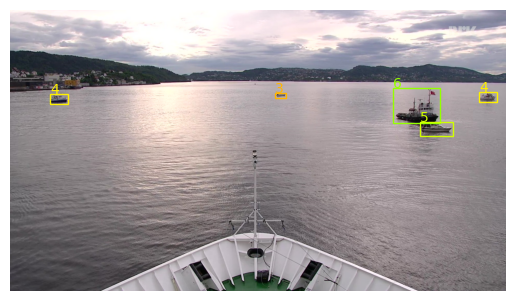

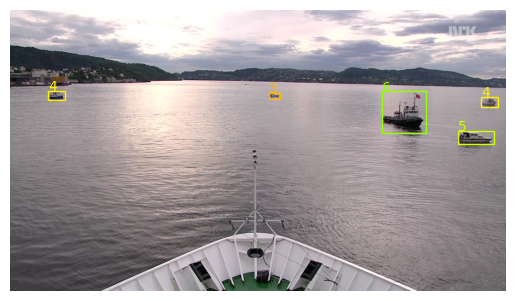

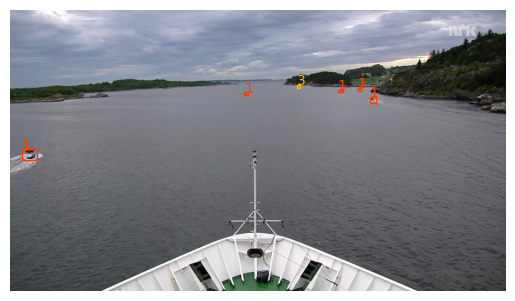

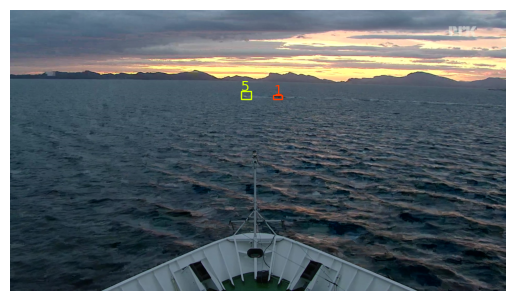

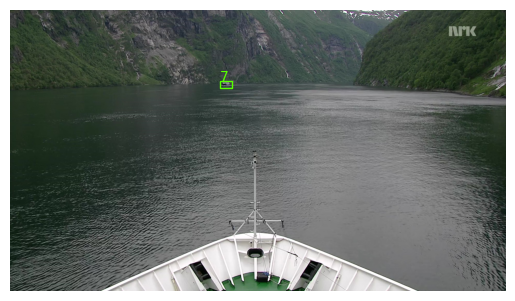

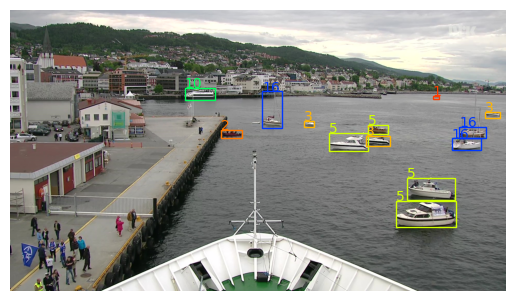

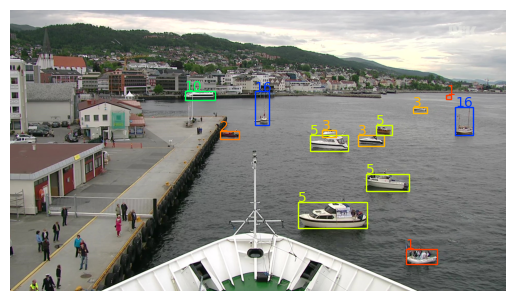

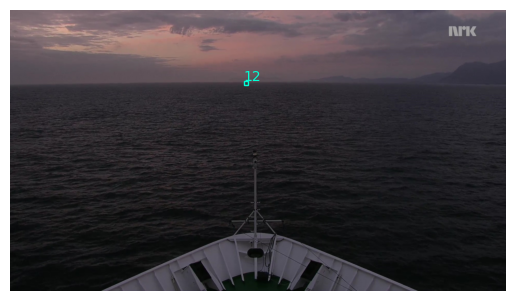

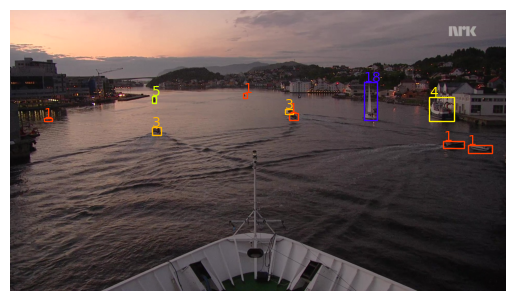

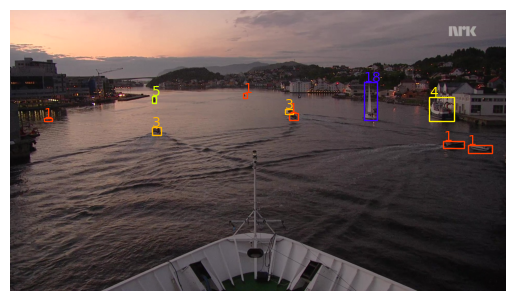

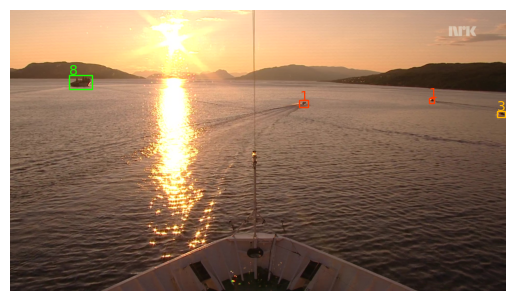

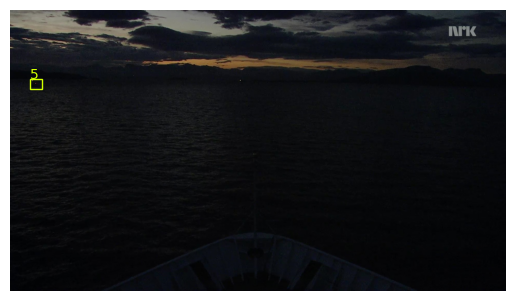

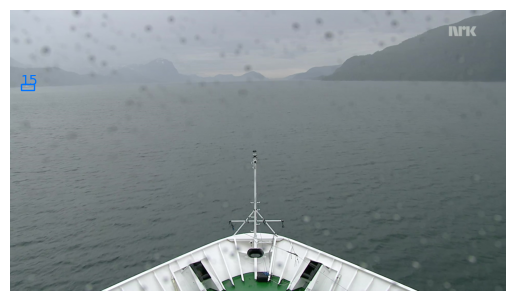

In [18]:
image_ids = [31, 32, 171, 197, 255, 367, 368, 484, 544, 544, 1000, 235,  305]
#images_path = './hurtigruten/images/'

for image_id in image_ids:
    data.visualizeImage(image_id, IMAGES_PATH)